In [157]:
import numpy as np
import matplotlib.pyplot as plt
import os
import struct
from vpython import *
import cv2

[autoreload of HEAD_RECON failed: Traceback (most recent call last):
  File "/Users/caseliang/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/caseliang/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/Users/caseliang/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/Users/caseliang/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 357, in update_class
    update_instances(old, new)
  File "/Users/caseliang/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in update_instances
    update_instances(old, new, obj, visited)
  File "/Users/caseliang/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 317, in upd

In [158]:
%load_ext autoreload
%autoreload 2
import HEAD_RECON

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
head =HEAD_RECON.threeD_head.read_from_file(3,6)



In [9]:
#head.sparsify(0.3)
head.filter_nan()
head.filter_depth(1.5)
head.center()

In [10]:
head.create_vpython_spheres()
head.save()

In [11]:
plt.show()

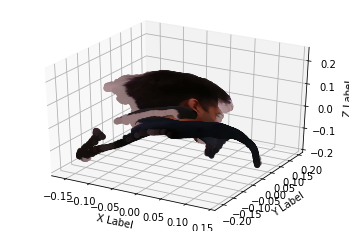

In [12]:

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

ax.scatter(head.xyz[:,0], -head.xyz[:,2], -head.xyz[:,1], c=head.rgb)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [13]:
head.xy_mesh

array([ 97607,  97608,  97609, ..., 307003, 307004, 307005])

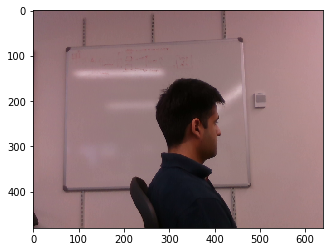

In [14]:
plt.imshow(head.twoD_image)

In [15]:
im = head.get_filtered_image()

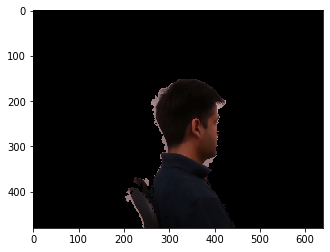

In [16]:
plt.imshow(im)

In [17]:
head.save()

In [18]:
im_save_path = "head_3_6.png"
plt.imsave(im_save_path,im)

In [262]:
head1 = HEAD_RECON.threeD_head.read_from_file(1,3)
head2 = HEAD_RECON.threeD_head.read_from_file(1,4)

remove danlging start 51965
remove dangling end 51955
51955
remove danlging start 51955
remove dangling end 51954
51954
remove danlging start 51954
remove dangling end 51954
51954
51954
51740
51575
51445
51334
51245
51173
51102
51033
50973
50925
50879
50838
50799
50766
50740
50715
50695
50678
50664
50652
50642
50635
50630
50627
50627
[0.54166416 0.42491746 0.4335613 ]
[0.17230971 0.10953842 0.09402013]
[0.61454521 0.48714807 0.50055958]
50627
50506
(50506, 3)
50450
(50450, 3)
50428
(50428, 3)
50419
(50419, 3)
50412
(50412, 3)
50406
(50406, 3)
50401
(50401, 3)
50397
(50397, 3)
50394
(50394, 3)
50392
(50392, 3)
50392
(50392, 3)
remove danlging start 49196
remove dangling end 49187
49187
remove danlging start 49187
remove dangling end 49185
49185
remove danlging start 49185
remove dangling end 49183
49183
remove danlging start 49183
remove dangling end 49183
49183
49183
48981
48833
48693
48567
48476
48401
48335
48283
48238
48202
48169
48136
48104
48075
48049
48022
48000
47993
47993
[0.547

In [264]:
img1,path1 = head1.get_filtered_image()
img2,path2 = head2.get_filtered_image()

1
1


In [269]:
kp1, des1 = HEAD_RECON.estimate_frame_transform.get_descriptors(path1)

(480, 640, 3)
[<KeyPoint 0x12690dea0>, <KeyPoint 0x12690d8a0>, <KeyPoint 0x12690d540>, <KeyPoint 0x12690dbd0>, <KeyPoint 0x12690db70>, <KeyPoint 0x12690d180>, <KeyPoint 0x12690d1e0>, <KeyPoint 0x12690df00>, <KeyPoint 0x12690d8d0>, <KeyPoint 0x12690d7e0>, <KeyPoint 0x12690da20>, <KeyPoint 0x12690d450>, <KeyPoint 0x12690dcc0>, <KeyPoint 0x12690db10>, <KeyPoint 0x12690d4e0>, <KeyPoint 0x12690d5a0>, <KeyPoint 0x12690df60>, <KeyPoint 0x12690dba0>, <KeyPoint 0x12690d870>, <KeyPoint 0x12690d570>, <KeyPoint 0x12690d720>, <KeyPoint 0x12690dc90>, <KeyPoint 0x126c93f60>, <KeyPoint 0x126c93210>, <KeyPoint 0x126c93e70>, <KeyPoint 0x126c93930>, <KeyPoint 0x126c930c0>, <KeyPoint 0x126c93cf0>, <KeyPoint 0x126c93270>, <KeyPoint 0x126c93240>, <KeyPoint 0x126c93ba0>, <KeyPoint 0x126c93d50>, <KeyPoint 0x126c93b40>, <KeyPoint 0x126c93510>, <KeyPoint 0x126c93990>, <KeyPoint 0x126c930f0>, <KeyPoint 0x126c93360>, <KeyPoint 0x126c934b0>, <KeyPoint 0x126c937e0>, <KeyPoint 0x126c93720>, <KeyPoint 0x126c93150>, <

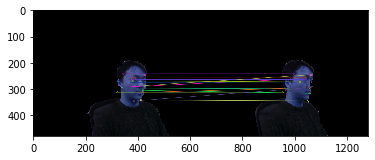

In [281]:
# test
kp1, des1 = HEAD_RECON.estimate_frame_transform.get_descriptors(path1)
kp2, des2 = HEAD_RECON.estimate_frame_transform.get_descriptors(path2)

good_without_list = HEAD_RECON.estimate_frame_transform.get_matched_points(path1,kp1,des1,path2,kp2,des2,0.8)

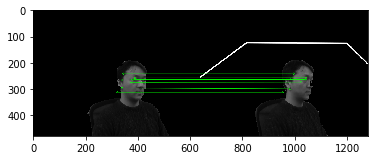

In [308]:
cleaned_match = HEAD_RECON.estimate_frame_transform.clean_matches(kp1,path1,kp2,path2,good_without_list)

In [311]:
cleaned_match

array([<DMatch 0x13a9ae9f0>, <DMatch 0x13a9ae6f0>, <DMatch 0x13a9ae9f0>,
       <DMatch 0x13a9ae9f0>, <DMatch 0x13a9ae9f0>, <DMatch 0x13a9ae9f0>,
       <DMatch 0x13a9ae9f0>, <DMatch 0x13a9ae6f0>, <DMatch 0x13a9ae6f0>,
       <DMatch 0x13a9ae9f0>, <DMatch 0x13a9ae9f0>, <DMatch 0x13a9ae6f0>,
       <DMatch 0x13a9ae6f0>, <DMatch 0x13a9ae6f0>, <DMatch 0x13a9ae6f0>,
       <DMatch 0x13a9ae6f0>], dtype=object)

In [ ]:
ii